In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# disable chained assignments, to remove the error of SettingWithCopyWarning .
pd.options.mode.chained_assignment = None 

In [3]:
marketing_df = pd.read_csv('./marketing_cva_f.csv')

In [4]:
marketing_df.head()

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507


In [5]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

### Note that FunctionTransformer and power transfomer when fit returns an array.so lets not mess up.
### we need to change it back.

In [6]:
### lets plot the histogram and QQ-side by side
# histogram and Q-Q plots

def check_normality(df, column_name):  
    plt.figure(figsize=(15,6))
    #sub_plot 1 for histogram
    plt.subplot(1, 2, 1)
    df[column_name].hist(bins=25)
    #sub_plot 2 for qq plot from scipy stat
    plt.subplot(1, 2, 2)
    stats.probplot(df[column_name], dist="norm", plot=plt)
    plt.show()

In [7]:
marketing_numeric=marketing_df.select_dtypes(include=np.number)

In [8]:
marketing_numeric.describe()

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.229340,50456.580461,92.963034,15.046941,47.832624,377.840789,50.126257
std,6949.067972,24305.956566,34.615160,10.064762,27.895350,252.648952,9.919767
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.099007,11.875974
25%,4090.750678,28432.000000,68.000000,6.000000,24.000000,210.100003,43.449925
50%,5810.630529,48081.000000,83.000000,14.000000,48.000000,340.800000,50.100924
75%,9075.768214,70187.000000,109.000000,23.000000,71.000000,498.612632,56.877234
max,83325.381190,99981.000000,297.000000,35.000000,99.000000,2893.239678,83.387485


In [9]:
marketing_numeric.columns

Index(['CLV', 'Income', 'monthly_premium', 'months_last_claim',
       'Months_Since_Policy_Inception', 'Total_Claim_Amount',
       'avg_vehicle_age'],
      dtype='object')

In [10]:
# lets define various function transformer
log_transformer = FunctionTransformer(np.log, validate=True)
reciprocal_transformer = FunctionTransformer(lambda x: 1/x, validate=True)
sqrt_transformer = FunctionTransformer(lambda x: x**(1/2), validate=True)
exp_transformer = FunctionTransformer(lambda x: x**(1/1.2), validate=True)  # randomly 1.2...

In [11]:
# lets define power transformer - Boxcox and Yeojohnson
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
yeojohn_transformer = PowerTransformer(method='yeo-johnson', standardize=False)


In [12]:
cols=marketing_numeric.columns
cols

Index(['CLV', 'Income', 'monthly_premium', 'months_last_claim',
       'Months_Since_Policy_Inception', 'Total_Claim_Amount',
       'avg_vehicle_age'],
      dtype='object')

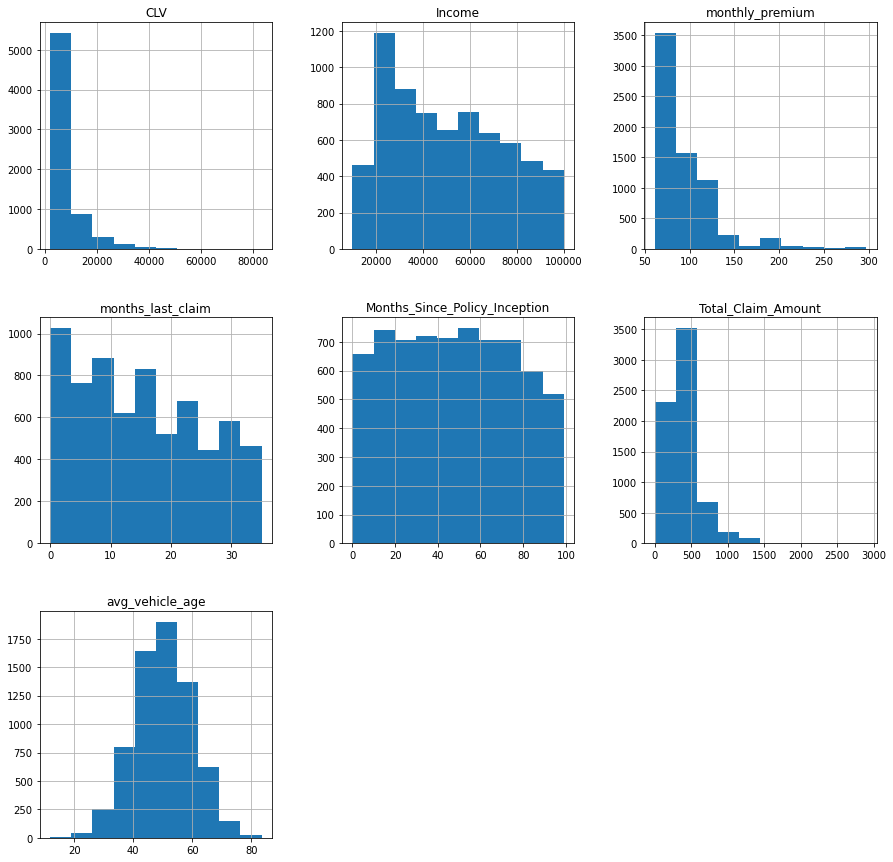

In [13]:
marketing_numeric.hist(figsize=(15,15))  ## 
plt.show()

In [14]:
### function Transformer
cols=['Income']
### logarithmic
transformed_log = log_transformer.transform(marketing_numeric[cols])  ## array.
marketing_numeric['transformed_log'] =transformed_log  ## lets add back to the dataframe

### reciprocal
transformed_reciprocal = reciprocal_transformer.transform(marketing_numeric[cols])  ## array.
marketing_numeric['transformed_reciprocal'] =transformed_reciprocal  ## lets add back to the dataframe

## squareroot
transformed_sqrt = sqrt_transformer.transform(marketing_numeric[cols])  ## array.
marketing_numeric['transformed_sqrt'] =transformed_sqrt  ## lets add back to the dataframe

# exponential
transformed_exp = exp_transformer.transform(marketing_numeric[cols])  ## array.
marketing_numeric['transformed_exp'] =transformed_exp  ## lets add back to the dataframe

In [15]:
## power Transformer, After definition you need to fit and transform.
cols=['Income']
boxcox_transformer.fit(marketing_numeric[cols])
transformed_boxcox = boxcox_transformer.transform(marketing_numeric[cols])  ## array.
marketing_numeric['transformed_boxcox'] =transformed_boxcox  ## lets add back to the dataframe

yeojohn_transformer.fit(marketing_numeric[cols])
transformed_yeoj = yeojohn_transformer.transform(marketing_numeric[cols])  ## array.
marketing_numeric['transformed_yeoj'] =transformed_yeoj  ## lets add back to the dataframe

In [16]:
yeojohn_transformer.lambdas_

array([0.44436579])

In [17]:
boxcox_transformer.lambdas_

array([0.44437538])

In [18]:
marketing_numeric.head(5)

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age,transformed_log,transformed_reciprocal,transformed_sqrt,transformed_exp,transformed_boxcox,transformed_yeoj
0,2763.519279,56274,69,32,5,384.811147,40.696695,10.937988,0.000018,237.221416,9090.542925,288.265512,288.243543
1,12887.431650,48767,108,18,38,566.472247,48.755298,10.794809,0.000021,220.832516,8068.107942,270.357157,270.337246
2,2813.692575,43836,73,12,44,138.130879,70.394474,10.688211,0.000023,209.370485,7382.312611,257.744892,257.726431
3,8256.297800,62902,69,14,94,159.383042,53.460212,11.049333,0.000016,250.802711,9974.406078,303.001540,302.977880
4,5380.898636,55350,67,0,13,321.600000,32.811507,10.921432,0.000018,235.265807,8965.985269,286.136012,286.114288


In [19]:
transfomed_cols =[x for x in marketing_numeric.columns if 'transformed' in x]
transfomed_cols

['transformed_log',
 'transformed_reciprocal',
 'transformed_sqrt',
 'transformed_exp',
 'transformed_boxcox',
 'transformed_yeoj']

**********************
transformed_log


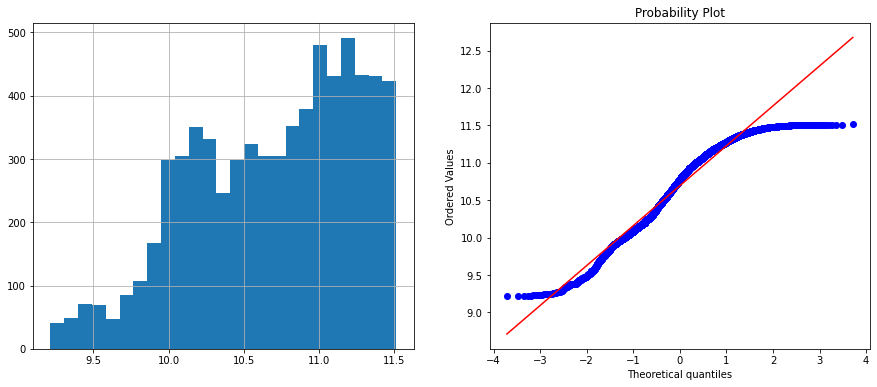


**********************
transformed_reciprocal


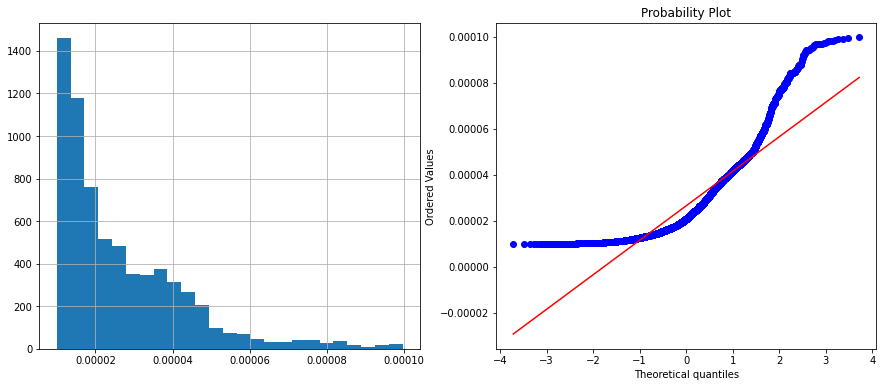


**********************
transformed_sqrt


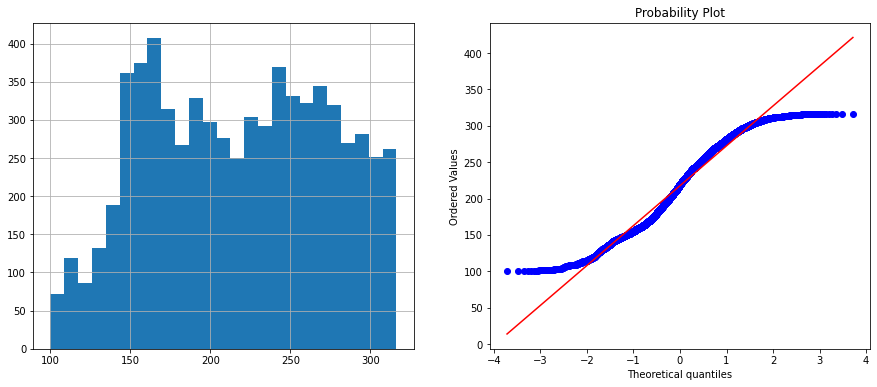


**********************
transformed_exp


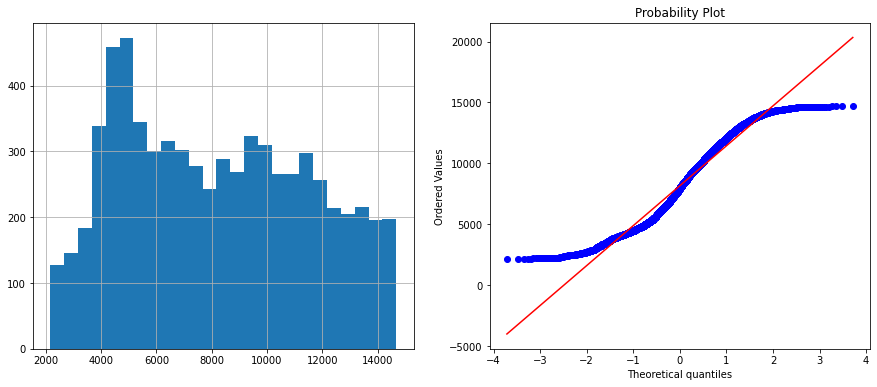


**********************
transformed_boxcox


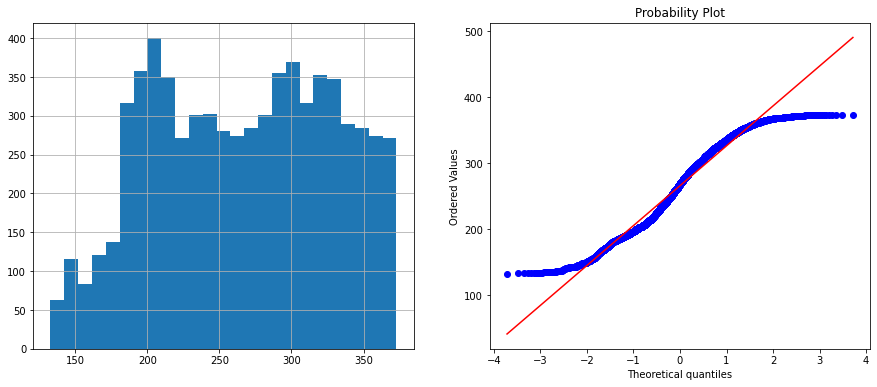


**********************
transformed_yeoj


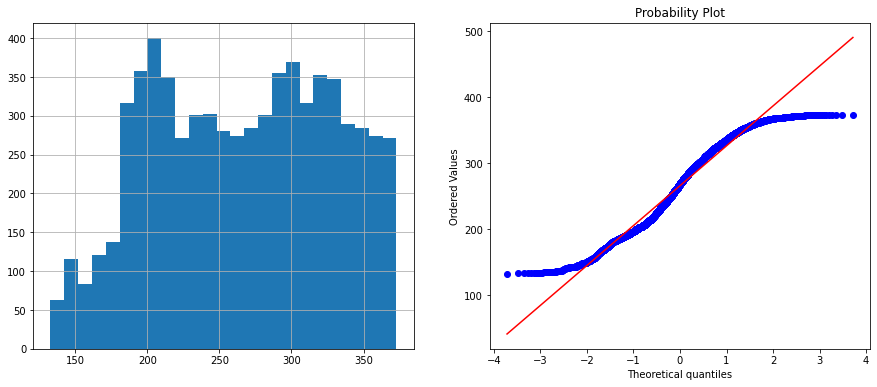

In [20]:
for each_col in transfomed_cols:
    print("**********************")
    print(each_col)
    check_normality(marketing_numeric,each_col)
    print()